Author: Diego Ruiz \
Affiliation: Alice&Bob - INRIA \
Date: 2023

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# repetition code

In [2]:
# distances of repetition code
d_list = [5,9,12,16,22]
# physical error rate = k1/k2
err_phy = np.logspace(-5,np.log10(3e-3),20)

# load logical error
ZLrep = np.load("./repetition code/ZLrepetition_cat.npy")

## fit

In [3]:
# bounds in the fit
bound = np.array([[0,12],[8,12],[11,15],[13,16]])

# physical error
X1 = err_phy[bound[0][0]:bound[0][1]]
X2 = err_phy[bound[1][0]:bound[1][1]]
X3 = err_phy[bound[2][0]:bound[2][1]]
X4 = err_phy[bound[3][0]:bound[3][1]]

# logical error
Y1 = ZLrep[0][bound[0][0]:bound[0][1]]
Y2 = ZLrep[1][bound[1][0]:bound[1][1]]
Y3 = ZLrep[2][bound[2][0]:bound[2][1]]
Y4 = ZLrep[3][bound[3][0]:bound[3][1]]

# fit function
def log_model(p, A, pth, d_scaling,d):
    return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))

# fit curves together
def combined_function(combined_X, A, pth, d_scaling):
    
    # extract each distance physical error 
    # from the concatenated list
    differences = bound[:, 1] - bound[:, 0]
    fit_bound = np.concatenate(([0], np.cumsum(differences)))
            
    X1 = combined_X[fit_bound[0]:fit_bound[1]]
    X2 = combined_X[fit_bound[1]:fit_bound[2]]
    X3 = combined_X[fit_bound[2]:fit_bound[3]]
    X4 = combined_X[fit_bound[3]:fit_bound[4]]

    # concatenate fit function of different distances
    result = np.concatenate((
        log_model(X1, A, pth, d_scaling, 5),
        log_model(X2, A, pth, d_scaling, 9),
        log_model(X3, A, pth, d_scaling, 12),
        log_model(X4, A, pth, d_scaling, 16),
    ))
    
    return result

# concatenate physical error rate
combined_X = np.concatenate((X1,X2,X3,X4))
# concatenate logical error rate
combined_Y = np.concatenate((Y1,Y2,Y3,Y4))

# Fit
params, covariance = curve_fit(combined_function, combined_X, np.log(combined_Y))

# fitted parameters
A, pth,d_scaling = params
print("A = ",A,'pth = ',pth,' d_scaling ',d_scaling)

A =  0.06893408973163936 pth =  0.0020582324991409036  d_scaling  0.4697648240282291


C:\Users\druiz\AppData\Local\Temp\ipykernel_8116\3414989004.py:18: RuntimeWarning: invalid value encountered in power
  return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))


## plot

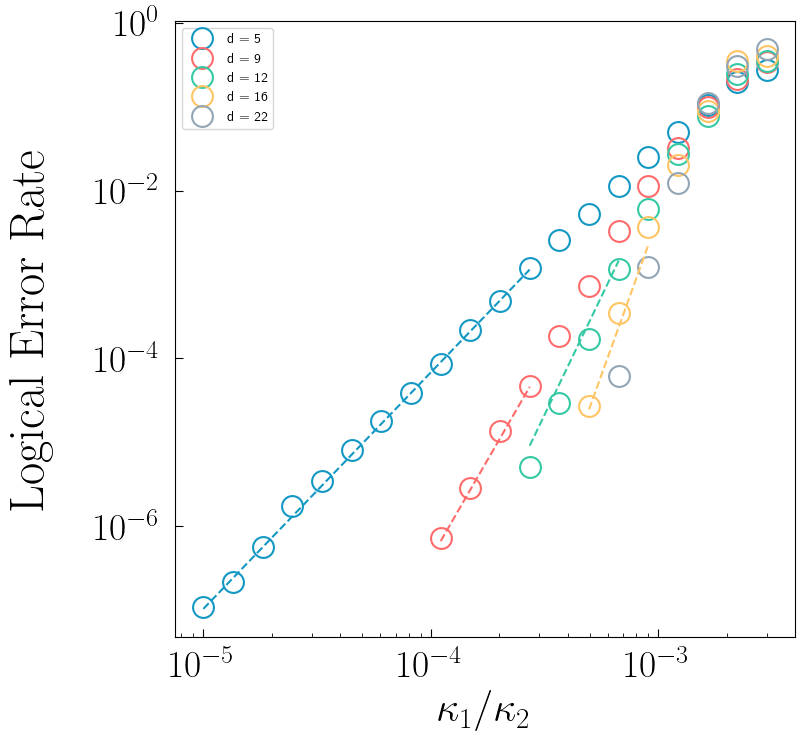

In [4]:
# color map
rgcolor = ['#1398c4', '#ff6b6b', '#34C9A4', '#ffc463', '#92A5B5', '#BA55D3', '#c0675c', '#20817d']

# print text with latex
plt.rcParams['text.usetex'] = True

# setup figure
fig,ax = plt.subplots()
fig.set_size_inches(8,8)

plt.xscale('log')
plt.yscale('log')

ax.get_xaxis().set_tick_params(which='major', direction='in', labelsize=27, length=6,pad = 10)
ax.get_xaxis().set_tick_params(which='minor', direction='in', labelsize=27, length=3)
ax.get_yaxis().set_tick_params(which='major', direction='in', labelsize=27, length=6,pad = 10)
ax.get_yaxis().set_tick_params(which='minor', direction='in', labelsize=27, length=3)
ax.set_xlabel(r'$\kappa_1/\kappa_2$', fontsize=30)
ax.set_ylabel(r'$\textrm{Logical Error Rate}$', fontsize=35,labelpad=30)

# plot logical error rate
d_list = [5,9,12,16,22]
for index,d in enumerate(d_list):
    plt.plot(err_phy,ZLrep[index],'o',label = 'd = '+str(d),fillstyle = 'none',c = rgcolor[index],markersize = 15,markeredgewidth = 1.5)
    
plt.legend()
    
# plot fit
plt.plot(X1, np.exp(log_model(X1, A, pth, d_scaling,5 )), '--',c = rgcolor[0])
plt.plot(X2, np.exp(log_model(X2, A, pth, d_scaling,9 )), '--',c = rgcolor[1])
plt.plot(X3, np.exp(log_model(X3, A, pth, d_scaling,12)), '--',c = rgcolor[2])
plt.plot(X4, np.exp(log_model(X4, A, pth, d_scaling,16)), '--',c = rgcolor[3])

# optimized code

In [5]:
# distances of the optimized code
d_list = [5,9,12,16,22]
# physical error rate = k1/k2
err_phy = np.logspace(-5,np.log10(3e-3),20)

L = 17

# load logical error
ZLoptimized = np.load("./optimized code/Logical error/ZLoptimized_cat.npy")

for i in range(len(ZLoptimized)):
    ZLoptimized[i] = 1 - (1 - ZLoptimized[i])**(1/L)

## fit

In [6]:
# bounds in the fit
bound = np.array([[0,10],[5,11],[8,12],[9,12],[10,13]])

# fit function
def log_model(p, B, d_scaling):
    return np.log(0.1*d_list[i]*(B*p)**(d_scaling*(d_list[i]+(d_list[i]%2))))

# store B value and d_scaling
B_tab = []
d_scaling_tab = []

# fit curves independantly
for i in range(len(d_list)):
    # physical error
    X = err_phy[bound[i][0]:bound[i][1]]

    # logical error
    Y = ZLoptimized[i][bound[i][0]:bound[i][1]]

    # Fit
    params, covariance = curve_fit(log_model, X, np.log(Y), maxfev=1000)
    
    # fitted parameters
    B, d_scaling = params
    B_tab.append(B)
    d_scaling_tab.append(d_scaling)
    print("d = ", d_list[i]," B = ",B,' d scaling ',d_scaling)

d =  5  B =  1416.827511122998  d scaling  0.46721690156118467
d =  9  B =  1595.5464465392802  d scaling  0.5070725532199274
d =  12  B =  1538.4052755472826  d scaling  0.5647970845369351
d =  16  B =  1604.2508252452442  d scaling  0.5002822854144061
d =  22  B =  1612.8907630050448  d scaling  0.47016937347640786


## plot

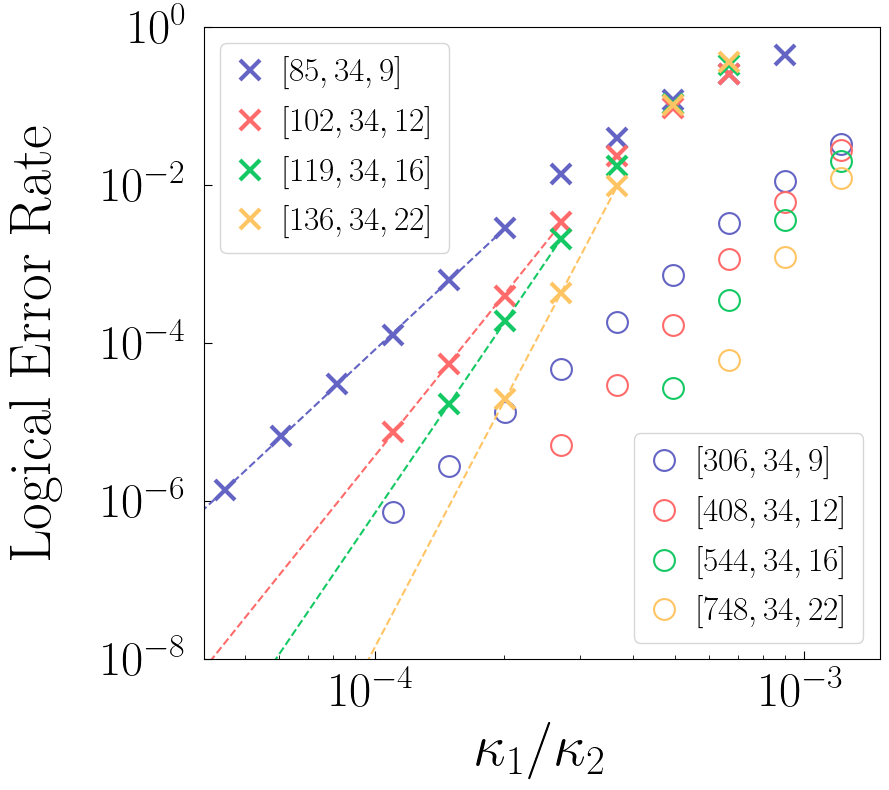

In [7]:
# color map
rgcolor = ['#6464c4', '#ff6b6b', '#14c964', '#ffc463', '#92A5B5', '#BA55D3', '#c0675c', '#20817d']

# use latex
plt.rcParams['text.usetex'] = True

# setup figure
fig,ax = plt.subplots()
fig.set_size_inches(9,8)

plt.xscale('log')
plt.yscale('log')

ax.get_xaxis().set_tick_params(which='major', direction='in', labelsize=35, length=6,pad = 10)
ax.get_xaxis().set_tick_params(which='minor', direction='in', labelsize=35, length=3)
ax.get_yaxis().set_tick_params(which='major', direction='in', labelsize=35, length=6,pad = 10)
ax.get_yaxis().set_tick_params(which='minor', direction='in', labelsize=35, length=3)
ax.set_xlabel(r'$\kappa_1/\kappa_2$', fontsize=42)
ax.set_ylabel(r'$\textrm{Logical Error Rate}$', fontsize=42,labelpad=30)

######### Plot repetition code #########

# physical error rate = k1/k2
err_phy = np.logspace(-5,np.log10(3e-3),20)

# plot logical error rate
d_list = [5,9,12,16,22]
for i in range(1,len(d_list)):
    plt.plot(err_phy,ZLrep[i],'o',fillstyle = 'none',c = rgcolor[i-1],markersize = 15,markeredgewidth = 1.5)
    
######### Plot optimized code #########

# plot logical error rate
d_list = [5,9,12,16,22]
for i in range(1,len(d_list)):
    plt.plot(err_phy,ZLoptimized[i],'x',c = rgcolor[i-1], markersize=15, markeredgewidth=3)
    
# plot fit
plt.plot(err_phy[:bound[1][1]], 0.1*d_list[1]*(B_tab[1]*err_phy[:bound[1][1]])**(d_scaling_tab[1]*(d_list[1]+(d_list[1]%2))), '--' ,c = rgcolor[0])
plt.plot(err_phy[:bound[2][1]], 0.1*d_list[2]*(B_tab[2]*err_phy[:bound[2][1]])**(d_scaling_tab[2]*(d_list[2]+(d_list[2]%2))), '--',c = rgcolor[1])
plt.plot(err_phy[:bound[3][1]], 0.1*d_list[3]*(B_tab[3]*err_phy[:bound[3][1]])**(d_scaling_tab[3]*(d_list[3]+(d_list[3]%2))), '--',c = rgcolor[2])
plt.plot(err_phy[:bound[4][1]], 0.1*d_list[4]*(B_tab[4]*err_phy[:bound[4][1]])**(d_scaling_tab[4]*(d_list[4]+(d_list[4]%2))), '--' ,c = rgcolor[3])

######### Plot legend #########

n_list = [68,85,102,119,136] # number of data qubits of the optimized code
d_list = [5,9,12,16,22] # distance of the optimized code

# legend optimized code
for i in range(1,len(d_list)):
    plt.plot([],[],'x',label = f'$[{n_list[i]},34,{d_list[i]}]$',c = rgcolor[i-1], markersize=15, markeredgewidth=3)

first_legend = ax.legend(loc='upper left', prop={'size': 24}, handlelength=1, handletextpad=0.5)


n_list = [170,306,408,544,748] # number of data qubits of the repetition code
d_list = [5,9,12,16,22] # distance of the repetition code

# legend repetition code
line0, = ax.plot([],[],'o',c = rgcolor[0],fillstyle = 'none',markersize = 15,markeredgewidth = 1.5)
line1, = ax.plot([],[],'o',c = rgcolor[1],fillstyle = 'none',markersize = 15,markeredgewidth = 1.5)
line2, = ax.plot([],[],'o',c = rgcolor[2],fillstyle = 'none',markersize = 15,markeredgewidth = 1.5)
line3, = ax.plot([],[],'o',c = rgcolor[3],fillstyle = 'none',markersize = 15,markeredgewidth = 1.5)

second_legend = ax.legend([line0,line1,line2,line3],
                          [f'$[306,34,9]$',f'$[408,34,12]$',f'$[544,34,16]$',f'$[748,34,22]$'],
                          loc='lower right', prop={'size': 24}, handlelength=1, handletextpad=0.5)

ax.add_artist(first_legend)

######### LAYOUT AND SAVE #########

plt.xlim((4e-5,1.5e-3))
plt.ylim((1e-8,1))

plt.tight_layout()
plt.savefig('Figure S2 c.pdf')